# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\LENOVO\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:52<00:00, 2082.15it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:27<00:00, 3953.36it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:22<00:00, 539.44it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [0]:
price_standardized

array([[0.00098843, 0.00191166, 0.00330448, ..., 0.00153418, 0.00046704,
        0.00070265]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [42]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm_notebook as tqdm1
from tqdm import tqdm
import time
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

from sklearn.model_selection import train_test_split

In [43]:
# project_data = pd.read_csv('train_data.csv', nrows=50000)
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [44]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


## Text preprocessing(1)

In [45]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [46]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   
2    Health & Wellness, Team Sports   
3             Literacy, Mathematics   
4                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories  
0               Literacy_Language  
1    History_Civics Health_Sports  
2                   Health_Sports  
3  Literacy_Language Math_Science  
4                    Math_Science

In [47]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
my_counter

Counter({'AppliedLearning': 12135,
         'Care_Hunger': 1388,
         'Health_Sports': 14223,
         'History_Civics': 5914,
         'Literacy_Language': 52239,
         'Math_Science': 41421,
         'Music_Arts': 10293,
         'SpecialNeeds': 13642,
         'Warmth': 1388})

In [48]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


# ind = np.arange(len(sorted_cat_dict))
# plt.figure(figsize=(20,5))
# p1 = plt.bar(ind, list(sorted_cat_dict.values()))

# plt.ylabel('Projects')
# plt.title('% of projects aproved category wise')
# plt.xticks(ind, list(sorted_cat_dict.keys()))
# plt.show()
# print(sorted_cat_dict)

In [49]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [50]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

In [51]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [52]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


# ind = np.arange(len(sorted_sub_cat_dict))
# plt.figure(figsize=(20,5))
# p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

# plt.ylabel('Projects')
# plt.title('% of projects aproved state wise')
# plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
# plt.show()

In [53]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [54]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id  quantity   price
0  p000001         7  459.56
1  p000002        21  515.89

In [55]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [56]:
#presence of the numerical digits in a strings with numeric : https://stackoverflow.com/a/19859308/8089731
def hasNumbers(inputString):
    return any(i.isdigit() for i in inputString)
p1 = project_data[['id','project_resource_summary']]
p1 = pd.DataFrame(data=p1)
p1.columns = ['id','digits_in_summary']
p1['digits_in_summary'] =  p1['digits_in_summary'].map(hasNumbers)
# https://stackoverflow.com/a/17383325/8089731
p1['digits_in_summary'] = p1['digits_in_summary'].astype(int)
project_data = pd.merge(project_data, p1, on='id', how='left')
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2  ... project_essay_4  \
0  \"The limits of your language are the limits o...  ...             NaN   
1  The projector we need for our school is very c...  ...             NaN   
2  The students on the campus come to school know...  ...             NaN   
3  My students live in high poverty conditions wi...  ...             NaN   
4  For many students, math is a subject that does...  ...             NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   
2                                            1                    0   
3                                            4                    1   
4                                            1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               essay quantity   price  \
0  My students are English learners that are work...       23  154.60   
1  Our students arrive to our school eager to lea...        1  299.00   
2  \r\n\"True champions aren't always the ones th...       22  516.85   
3  I work at a unique school filled with both ESL...        4  232.90   
4  Our second grade classroom next year will be m...        4   67.98   

   digits_in_summary  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 21 columns]

## Text preprocessing(2)

In [57]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [58]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [59]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm1(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = re.sub('nannan', '', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

In [60]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for title in tqdm1(project_data['project_title'].values):
    _title = decontracted(title)
    _title = _title.replace('\\r', ' ')
    _title = _title.replace('\\"', ' ')
    _title = _title.replace('\\n', ' ')
    _title = re.sub('[^A-Za-z0-9]+', ' ', _title)
    # https://gist.github.com/sebleier/554280
    _title = ' '.join(e for e in _title.split() if e not in stopwords)
    preprocessed_titles.append(_title.lower().strip())

In [61]:
preprocessed_titles[1000]

'sailing into super 4th grade year'

In [62]:
project_grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_grade_cat_list = []
for i in tqdm1(project_grade_catogories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    project_grade_cat_list.append(temp.strip())

In [63]:
project_data['clean_project_grade_category'] = project_grade_cat_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  ...  \
0  \"The limits of your language are the limits o...             NaN  ...   
1  The projector we need for our school is very c...             NaN  ...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay quantity  price  \
0  My students are English learners that are work...       23  154.6   
1  Our students arrive to our school eager to lea...        1  299.0   

   digits_in_summary  clean_project_grade_category  
0                  0                  GradesPreK-2  
1                  0                     Grades6-8  

[2 rows x 21 columns]

In [64]:
project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  quantity  price  \
0  My students are English learners that are work...        23  154.6   
1  Our students arrive to our school eager to lea...         1  299.0   

   digits_in_summary clean_project_grade_category  
0                  0                 GradesPreK-2  
1                  0                    Grades6-8

In [65]:
#Replacing Nan's with maximum occured value: https://stackoverflow.com/a/51053916/8089731
project_data['teacher_prefix'].value_counts().argmax()
project_data.fillna(value=project_data['teacher_prefix'].value_counts().argmax(),axis=1,inplace=True)

In [66]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data['preprocessed_titles'] = preprocessed_titles

In [67]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'quantity', 'price',
       'digits_in_summary', 'clean_project_grade_category',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [68]:
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
# X_cv.drop(['project_is_approved'], axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(73196, 18)
(36052, 18)


### 1.4.1 Vectorizing Categorical data

In [69]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_cat.fit(X_train['clean_categories'].values)
print(vectorizer_cat.get_feature_names())


categories_one_hot_train = vectorizer_cat.transform(X_train['clean_categories'].values)
# categories_one_hot_cv = vectorizer_cat.transform(X_cv['clean_categories'].values)
categories_one_hot_test = vectorizer_cat.transform(X_test['clean_categories'].values)
print("Shape of matrix after one hot encodig_train ",categories_one_hot_train.shape)
# print("Shape of matrix after one hot encodig_cv ",categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig_test ",categories_one_hot_test.shape)

['AppliedLearning', 'History_Civics', 'Care_Hunger', 'Music_Arts', 'SpecialNeeds', 'Math_Science', 'Health_Sports', 'Literacy_Language', 'Warmth']
Shape of matrix after one hot encodig_train  (73196, 9)
Shape of matrix after one hot encodig_test  (36052, 9)


In [70]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer_sub_cat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_sub_cat.fit(X_train['clean_subcategories'].values)
print(vectorizer_sub_cat.get_feature_names())


sub_categories_one_hot_train = vectorizer_sub_cat.transform(X_train['clean_subcategories'].values)
# sub_categories_one_hot_cv = vectorizer_sub_cat.transform(X_cv['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_cat.transform(X_test['clean_subcategories'].values)
print("Shape of matrix after one hot encodig_train ",sub_categories_one_hot_train.shape)
# print("Shape of matrix after one hot encodig_cv ",sub_categories_one_hot_cv.shape)
print("Shape of matrix after one hot encodig_test ",sub_categories_one_hot_test.shape)

['NutritionEducation', 'ForeignLanguages', 'CharacterEducation', 'TeamSports', 'Economics', 'Mathematics', 'Literature_Writing', 'History_Geography', 'Other', 'Care_Hunger', 'PerformingArts', 'AppliedSciences', 'CommunityService', 'ESL', 'Health_LifeScience', 'Extracurricular', 'EarlyDevelopment', 'SocialSciences', 'Health_Wellness', 'ParentInvolvement', 'FinancialLiteracy', 'EnvironmentalScience', 'Literacy', 'College_CareerPrep', 'SpecialNeeds', 'Civics_Government', 'VisualArts', 'Gym_Fitness', 'Music', 'Warmth']
Shape of matrix after one hot encodig_train  (73196, 30)
Shape of matrix after one hot encodig_test  (36052, 30)


In [71]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_state = CountVectorizer( lowercase=False, binary=True)
vectorizer_state.fit(X_train['school_state'].values)
print(vectorizer_state.get_feature_names())


school_state_one_hot_train = vectorizer_state.transform(X_train['school_state'].values)
# school_state_one_hot_cv = vectorizer_state.transform(X_cv['school_state'].values)
school_state_one_hot_test = vectorizer_state.transform(X_test['school_state'].values)
print("Shape of matrix after one hot encodig_train ",school_state_one_hot_train.shape)
# print("Shape of matrix after one hot encodig_cv ",school_state_one_hot_cv.shape)
print("Shape of matrix after one hot encodig_test ",school_state_one_hot_test.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig_train  (73196, 51)
Shape of matrix after one hot encodig_test  (36052, 51)


In [72]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_teacherprefix = CountVectorizer( lowercase=False, binary=True)
vectorizer_teacherprefix.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer_teacherprefix.get_feature_names())

#https://stackoverflow.com/a/39308809/8089731
teacher_prefix_one_hot_train = vectorizer_teacherprefix.transform(X_train['teacher_prefix'].values.astype('U'))
# teacher_prefix_one_hot_cv = vectorizer_teacherprefix.transform(X_cv['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_test = vectorizer_teacherprefix.transform(X_test['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig_train ",teacher_prefix_one_hot_train.shape)
# print("Shape of matrix after one hot encodig_cv ",teacher_prefix_one_hot_cv.shape)
print("Shape of matrix after one hot encodig_test ",teacher_prefix_one_hot_test[:5,:])
# print(X_train['teacher_prefix'].value_counts())

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig_train  (73196, 5)
Shape of matrix after one hot encodig_test    (0, 2)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1
  (4, 2)	1


In [73]:
print(project_data['clean_project_grade_category'].unique())

['GradesPreK-2' 'Grades6-8' 'Grades3-5' 'Grades9-12']


In [74]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
# https://stackoverflow.com/a/38161028/8089731
pattern = "(?u)\\b[\\w-]+\\b"
vectorizer_projectgrade = CountVectorizer(token_pattern=pattern, lowercase=False, binary=True)
vectorizer_projectgrade.fit(X_train['clean_project_grade_category'].values)
print(vectorizer_projectgrade.get_feature_names())

#https://stackoverflow.com/a/39308809/8089731
project_grade_category_one_hot_train = vectorizer_projectgrade.transform(X_train['clean_project_grade_category'].values)
# project_grade_category_one_hot_cv = vectorizer_projectgrade.transform(X_cv['clean_project_grade_category'].values)
project_grade_category_one_hot_test = vectorizer_projectgrade.transform(X_test['clean_project_grade_category'].values)
print("Shape of matrix after one hot encodig_train ",project_grade_category_one_hot_train.shape)
# print("Shape of matrix after one hot encodig_cv ",project_grade_category_one_hot_cv.shape)
print("Shape of matrix after one hot encodig_test ",project_grade_category_one_hot_test[:5,:])

['Grades3-5', 'Grades6-8', 'Grades9-12', 'GradesPreK-2']
Shape of matrix after one hot encodig_train  (73196, 4)
Shape of matrix after one hot encodig_test    (0, 3)	1
  (1, 3)	1
  (2, 1)	1
  (3, 0)	1
  (4, 0)	1


### Vectorizing Numerical features

In [76]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
# price_standardized_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
print(price_standardized_train.shape)
# print(price_standardized_cv.shape)
print(price_standardized_test.shape)

(73196, 1)
(36052, 1)


In [77]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
# quantity_standardized_cv = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
print(quantity_standardized_train.shape)
# print(quantity_standardized_cv.shape)
print(quantity_standardized_test.shape)

(73196, 1)
(36052, 1)


In [78]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = teacher_number_of_previously_posted_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
# teacher_number_of_previously_posted_projects_standardized_cv = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
teacher_number_of_previously_posted_projects_standardized_test = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(teacher_number_of_previously_posted_projects_standardized_train.shape)
# print(teacher_number_of_previously_posted_projects_standardized_cv.shape)
print(teacher_number_of_previously_posted_projects_standardized_test.shape)

(73196, 1)
(36052, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [79]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
27762       30329  p080804  57139af995050f382746324499ae3502           Mrs.   
38761      177627  p092250  8740d7fe45f011d8d600995c2f02a105           Mrs.   

      school_state project_submitted_datetime  \
27762           CA        2016-07-18 12:29:08   
38761           TX        2017-01-24 16:28:55   

                             project_title  \
27762  Science and Engineering Comes Alive   
38761             Robotics and Coding Ipad   

                                project_resource_summary  \
27762  My students need STEM lab materials to help th...   
38761  My students need an iPad to program and code t...   

       teacher_number_of_previously_posted_projects  \
27762                                             1   
38761                                             0   

                   clean_categories                   clean_subcategories  \
27762                  Math_Science  AppliedSciences EnvironmentalScience   
38761  Math_Science AppliedLearning    AppliedSciences College_CareerPrep   

                                                   essay  quantity   price  \
27762  I teach fourth grade at Thomas Jefferson Eleme...        10  636.34   
38761  A.P. Beutel Elementary is apart of the Brazosp...         2  446.72   

       digits_in_summary clean_project_grade_category  \
27762                  0                    Grades3-5   
38761                  0                    Grades3-5   

                                     preprocessed_essays  \
27762  i teach fourth grade thomas jefferson elementa...   
38761  a p beutel elementary apart brazosport indepen...   

                   preprocessed_titles  
27762  science engineering comes alive  
38761             robotics coding ipad

## Bag of Words(BOW) on `project_TEXT/ESSAYS`(Train,Cv,Test)

In [80]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essays = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
vectorizer_bow_essays.fit(X_train['preprocessed_essays'])

text_bow_train = vectorizer_bow_essays.transform(X_train['preprocessed_essays'])
# text_bow_cv = vectorizer_bow_essays.transform(X_cv['preprocessed_essays'])
text_bow_test = vectorizer_bow_essays.transform(X_test['preprocessed_essays'])
print("Shape of matrix after BOW_text_train ",text_bow_train.shape)
# print("Shape of matrix after BOW_text_cv ",text_bow_cv.shape)
print("Shape of matrix after BOW_text_test ",text_bow_test.shape)

Shape of matrix after BOW_text_train  (73196, 5000)
Shape of matrix after BOW_text_test  (36052, 5000)


## Bag of Words(BOW) on `project_title`(Train,Cv,Test)

In [81]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_titles = CountVectorizer(min_df=10)
vectorizer_bow_titles.fit(X_train['preprocessed_titles'])

title_bow_train = vectorizer_bow_titles.transform(X_train['preprocessed_titles'])
# title_bow_cv = vectorizer_bow_titles.transform(X_cv['preprocessed_titles'])
title_bow_test = vectorizer_bow_titles.transform(X_test['preprocessed_titles'])
print("Shape of matrix after BOW_title_train ",title_bow_train.shape)
# print("Shape of matrix after BOW_title_cv ",title_bow_cv.shape)
print("Shape of matrix after BOW_title_test ",title_bow_test.shape)

Shape of matrix after BOW_title_train  (73196, 2644)
Shape of matrix after BOW_title_test  (36052, 2644)


## TFIDF Vectorizer on `project_TEXT/ESSAYS`(Train,Cv,Test)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essays = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,2))
vectorizer_tfidf_essays.fit(X_train['preprocessed_essays'])

text_tfidf_train = vectorizer_tfidf_essays.transform(X_train['preprocessed_essays'])
# text_tfidf_cv = vectorizer_tfidf_essays.transform(X_cv['preprocessed_essays'])
text_tfidf_test = vectorizer_tfidf_essays.transform(X_test['preprocessed_essays'])
print("Shape of matrix after tfidf_text_train ",text_tfidf_train.shape)
# print("Shape of matrix after tfidf_text_cv ",text_tfidf_cv.shape)
print("Shape of matrix after tfidf_text_test ",text_tfidf_test.shape)

Shape of matrix after tfidf_text_train  (73196, 5000)
Shape of matrix after tfidf_text_test  (36052, 5000)


In [5]:
(text_tfidf_train.shape)

(73196, 5000)

## TFIDF Vectorizer on `project_title`(Train,Cv,Test)

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train['preprocessed_titles'])

title_tfidf_train = vectorizer_tfidf_title.transform(X_train['preprocessed_titles'])
# title_tfidf_cv = vectorizer_tfidf_title.transform(X_cv['preprocessed_titles'])
title_tfidf_test = vectorizer_tfidf_title.transform(X_test['preprocessed_titles'])
print("Shape of matrix after tfidf_title_train ",title_tfidf_train.shape)
# print("Shape of matrix after tfidf_title_cv ",title_tfidf_cv.shape)
print("Shape of matrix after tfidf_title_test ",title_tfidf_test.shape)

Shape of matrix after tfidf_title_train  (73196, 2644)
Shape of matrix after tfidf_title_test  (36052, 2644)


In [84]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Avg W2V on TEXT/ESSAYS(Train,cv,test)

In [85]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_essays_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_vectors_train.append(vector)
    
# avg_w2v_essays_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm1(X_cv['preprocessed_essays']): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_essays_vectors_cv.append(vector)
    
avg_w2v_essays_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essays_vectors_test.append(vector)

print(len(avg_w2v_essays_vectors_train))
# print(len(avg_w2v_essays_vectors_cv))
print(len(avg_w2v_essays_vectors_test))
print(len(avg_w2v_essays_vectors_train[0]))
# print(len(avg_w2v_essays_vectors_cv[0]))
print(len(avg_w2v_essays_vectors_test[0]))


73196
36052
300
300


## Avg W2V on TITLES(Train,cv,test)

In [86]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_titles_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_vectors_train.append(vector)
    
# avg_w2v_titles_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm1(X_cv['preprocessed_titles']): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word]
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_titles_vectors_cv.append(vector)
    
avg_w2v_titles_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_vectors_test.append(vector)

print(len(avg_w2v_titles_vectors_train))
# print(len(avg_w2v_titles_vectors_cv))
print(len(avg_w2v_titles_vectors_test))
print(len(avg_w2v_titles_vectors_train[0]))
# print(len(avg_w2v_titles_vectors_cv[0]))
print(len(avg_w2v_titles_vectors_test[0]))


73196
36052
300
300


## TFIDF weighted W2V on TEXT/ESSAYS(Train,cv,test)

In [87]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
#******************************************************************************
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_vectors_train.append(vector)

    
# # average Word2Vec
# # compute average word2vec for each review.
# tfidf_w2v_essays_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm1(X_cv['preprocessed_essays']): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if (word in glove_words) and (word in tfidf_words):
#             vec = model[word] # getting the vector for each word
#             # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#             tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#             vector += (vec * tf_idf) # calculating tfidf weighted w2v
#             tf_idf_weight += tf_idf
#     if tf_idf_weight != 0:
#         vector /= tf_idf_weight
#     tfidf_w2v_essays_vectors_cv.append(vector)
    

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essays_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essays_vectors_test.append(vector)

print(len(tfidf_w2v_essays_vectors_train))
# print(len(tfidf_w2v_essays_vectors_cv))
print(len(tfidf_w2v_essays_vectors_test))
print(len(tfidf_w2v_essays_vectors_train[0]))
# print(len(tfidf_w2v_essays_vectors_cv[0]))
print(len(tfidf_w2v_essays_vectors_test[0]))


73196
36052
300
300


## TFIDF weighted W2V on TITLES(Train,cv,test)

In [88]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
#******************************************************************************
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_titles_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles_vectors_train.append(vector)

    
# # average Word2Vec
# # compute average word2vec for each review.
# tfidf_w2v_titles_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
# for sentence in tqdm1(X_cv['preprocessed_titles']): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if (word in glove_words) and (word in tfidf_words):
#             vec = model[word] # getting the vector for each word
#             # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#             tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#             vector += (vec * tf_idf) # calculating tfidf weighted w2v
#             tf_idf_weight += tf_idf
#     if tf_idf_weight != 0:
#         vector /= tf_idf_weight
#     tfidf_w2v_titles_vectors_cv.append(vector)
    

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_titles_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm1(X_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles_vectors_test.append(vector)

print(len(tfidf_w2v_titles_vectors_train))
# print(len(tfidf_w2v_titles_vectors_cv))
print(len(tfidf_w2v_titles_vectors_test))
print(len(tfidf_w2v_titles_vectors_train[0]))
# print(len(tfidf_w2v_titles_vectors_cv[0]))
print(len(tfidf_w2v_titles_vectors_test[0]))


73196
36052
300
300


In [89]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'quantity', 'price',
       'digits_in_summary', 'clean_project_grade_category',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

In [3]:
import dill
# dill.dump_session('notebook_env.db')
dill.load_session('../notebook_env.db')

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [3]:
# Please write all the code with proper documentation

In [4]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,text_bow_train,title_bow_train)).tocsr()
# X_cr = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv
#                ,project_grade_category_one_hot_cv,price_standardized_cv,quantity_standardized_cv
#                ,teacher_number_of_previously_posted_projects_standardized_cv,text_bow_cv,title_bow_cv)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,text_bow_test,title_bow_test)).tocsr()

print("Final Data matrix on BOW")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on BOW
(73196, 7740) (73196,)
(36052, 7740) (36052,)


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time


start_time = time.time()
dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split': [5, 10, 100]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



Execution time: 8694.8486495018 ms


In [7]:
train_auc = train_auc.reshape(5,3)
cv_auc = cv_auc.reshape(5,3)
train_auc
cv_auc

array([[0.57056045, 0.57056045, 0.57056045],
       [0.66588247, 0.66600487, 0.66594038],
       [0.68325238, 0.68218258, 0.68394798],
       [0.59884446, 0.60175736, 0.62898845],
       [0.57967864, 0.58060009, 0.60601595]])

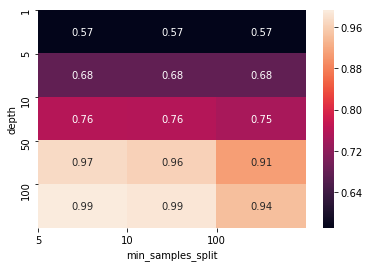

In [8]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()


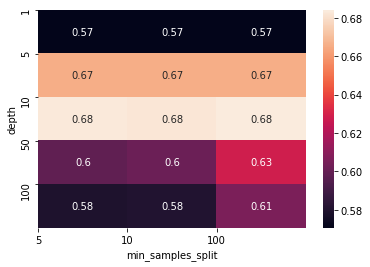

In [9]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()


In [10]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

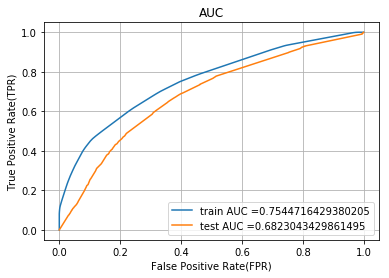

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)

dt.fit(X_tr, y_train)

y_train_pred = batch_predict(dt, X_tr[:,:])    
y_test_pred = batch_predict(dt, X_te[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [1]:
import dill
# dill.dump_session('notebook_env1.db')
dill.load_session('notebook_env1.db')

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [3]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4696327153902261 for threshold 0.489
[[ 7850  3233]
 [20929 41184]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4166010711862358 for threshold 0.489
[[ 3501  1958]
 [10720 19873]]


the maximum value of tpr*(1-fpr) 0.4696327153902261 for threshold 0.489


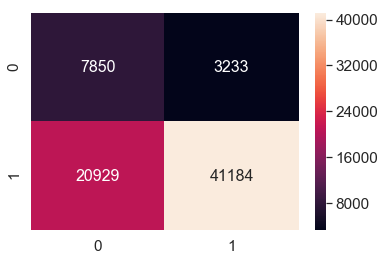

In [4]:
conf_matr_df_train =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.4166010711862358 for threshold 0.489


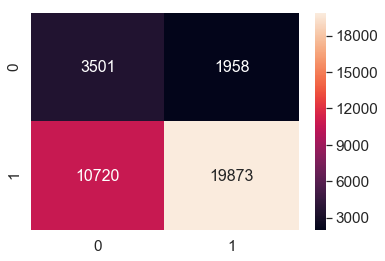

In [5]:
conf_matr_df_test =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### WordCloud

In [6]:
bow_test = text_tfidf_test.todense()
bow_test.shape

(36052, 5000)

In [7]:
vectorizer_bow_essay = CountVectorizer(min_df=10,max_features=5000) 
a = vectorizer_bow_essay.fit(X_train["preprocessed_essays"])

In [8]:
bow_features = a.get_feature_names()
len(bow_features)

5000

In [9]:
len(y_test_pred)

36052

In [10]:
y_test_conv = list(y_test[::])

In [11]:
fp_index = [] 
fp_count = 0 
for i in tqdm(range(len(y_test_pred))):
    if y_test_conv[i] == 0 and y_test_pred[i] >= 0.8:
        fp_index.append(i)        
        fp_count = fp_count + 1     
    else :
        continue


100%|███████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 2259204.08it/s]


In [12]:
fp_count

519

In [13]:
df1 = pd.DataFrame(bow_test)

In [14]:
df1.shape

(36052, 5000)

In [15]:
df1_final = df1.iloc[fp_index,:]

In [20]:
best_indices = [] 
for j in range(5000):
    s = df1_final[j].sum()
    if s >= 10 :
        best_indices.append(j)
    else:
        continue


In [21]:
len(best_indices)

29

In [22]:
fp_words = []
for a in best_indices :
    fp_words.append(str(bow_features[a]))


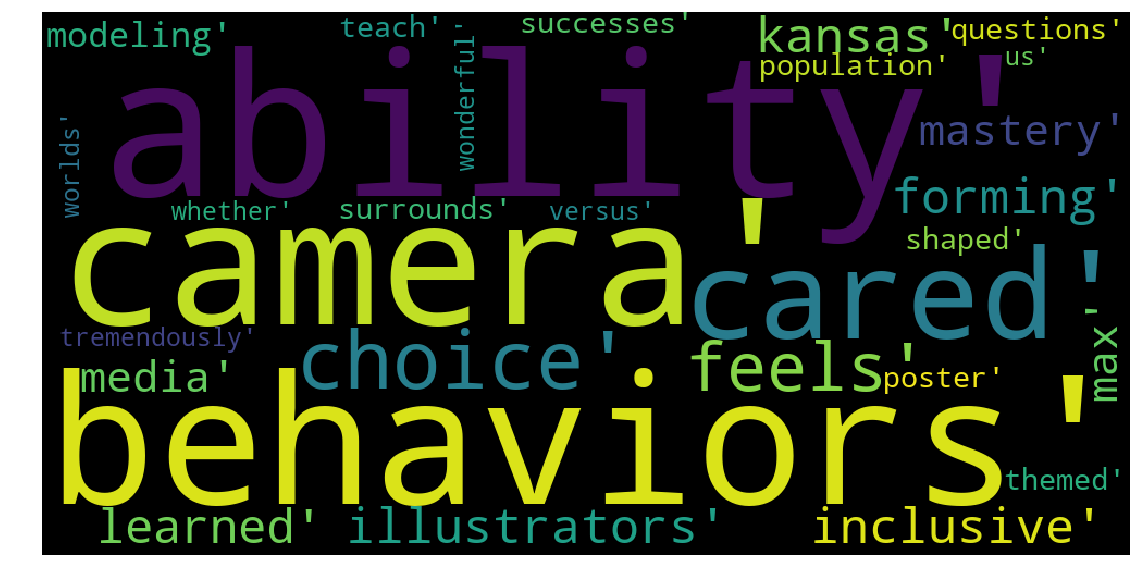

In [23]:
from wordcloud import WordCloud
# unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(str(fp_words))
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()


### Box Plot

In [24]:
df2 = pd.DataFrame(X_test['price'])

In [25]:
df2_final = df2.iloc[fp_index,:]

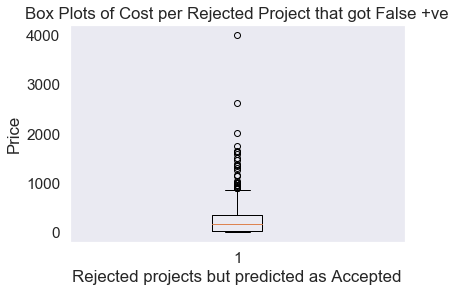

In [26]:
plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got False +ve')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

### PDF

In [27]:
df3 = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [28]:
df3_final = df3.iloc[fp_index,:]

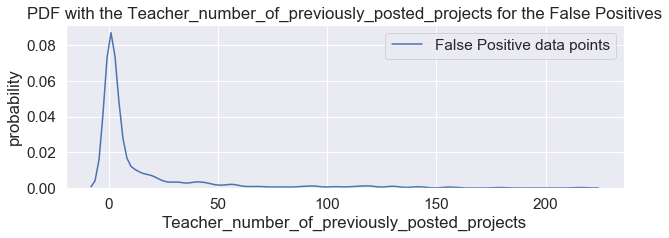

In [29]:
plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [30]:
bow_features_names = []

In [31]:
for a in vectorizer_cat.get_feature_names() :
    bow_features_names.append(a)

In [32]:
for a in vectorizer_sub_cat.get_feature_names() :
    bow_features_names.append(a)

In [33]:
for a in vectorizer_state.get_feature_names() :
    bow_features_names.append(a)

In [34]:
for a in vectorizer_teacherprefix.get_feature_names() :
    bow_features_names.append(a)

In [35]:
for a in vectorizer_projectgrade.get_feature_names() :
    bow_features_names.append(a)

In [36]:
bow_features_names.append("price")
bow_features_names.append("quantity")
bow_features_names.append("teacher_number_of_previously_posted")

In [37]:
for a in vectorizer_bow_essays.get_feature_names() :
    bow_features_names.append(a)

In [38]:
for a in vectorizer_bow_titles.get_feature_names() :
    bow_features_names.append(a)

In [39]:
len(bow_features_names)

7740

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_tr,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

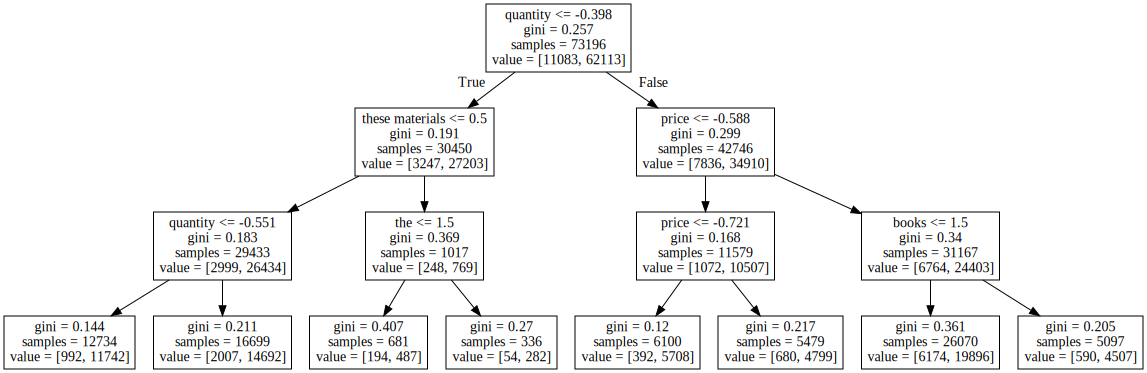

In [42]:
import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(dtree, out_file=None,feature_names=bow_features_names)
graph = graphviz.Source(dot_data)
graph.render("bow tree",view = True)
graphviz.Source(dot_data).view()

from IPython.display import display

with open("Source.gv") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# import graphviz
# from sklearn import tree
# from graphviz import Source
# dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=tfidf_features_names)
# graph = graphviz.Source(dot_data)
# graph.render("Tfidf tree",view = True)

In [0]:
# Please write all the code with proper documentation

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

In [2]:
import dill
# dill.dump_session('notebook_env.db')
dill.load_session('../notebook_env.db')

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
avg_w2v_essays_vectors_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [5]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,text_tfidf_train,title_tfidf_train)).tocsr()
# X_cr = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv
#                ,project_grade_category_one_hot_cv,price_standardized_cv,quantity_standardized_cv
#                ,teacher_number_of_previously_posted_projects_standardized_cv,text_tfidf_cv,title_tfidf_cv)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,text_tfidf_test,title_tfidf_test)).tocsr()

print("Final Data matrix on TFIDF")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on TFIDF
(73196, 7740) (73196,)
(36052, 7740) (36052,)


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time


start_time = time.time()
dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split': [5, 10, 100]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



Execution time: 8254.5986931324 ms


In [4]:
train_auc = train_auc.reshape(5,3)
cv_auc = cv_auc.reshape(5,3)
train_auc
cv_auc

array([[0.57056045, 0.57056045, 0.57056045],
       [0.66405305, 0.66403298, 0.66409728],
       [0.67746062, 0.67742418, 0.67775195],
       [0.59395246, 0.59138341, 0.62315227],
       [0.57497633, 0.5770431 , 0.5972612 ]])

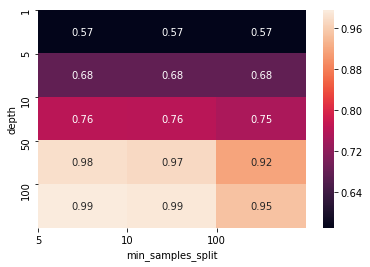

In [16]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()

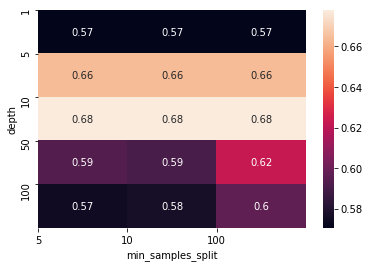

In [17]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()

In [22]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

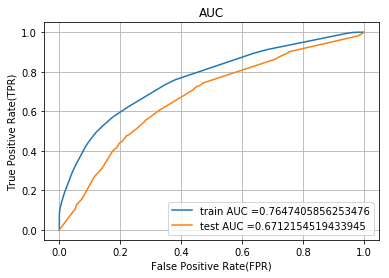

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)

dt.fit(X_tr, y_train)

y_train_pred = batch_predict(dt, X_tr[:,:])    
y_test_pred = batch_predict(dt, X_te[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [2]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [3]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.48303441894072213 for threshold 0.48
[[ 7651  3432]
 [18652 43461]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.40669045578260055 for threshold 0.504
[[ 3653  1806]
 [12000 18593]]


the maximum value of tpr*(1-fpr) 0.48303441894072213 for threshold 0.48


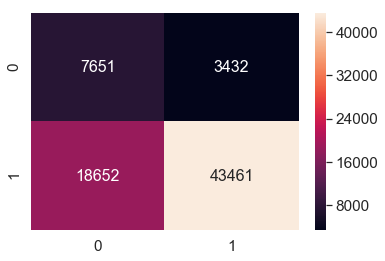

In [4]:
conf_matr_df_train =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.40669045578260055 for threshold 0.504


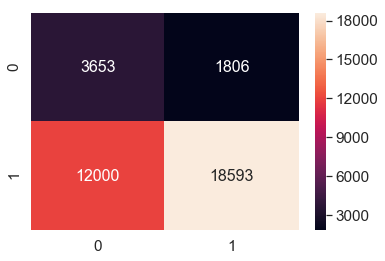

In [5]:
conf_matr_df_test =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### WordCloud

In [8]:
tfidf_test = text_tfidf_test.todense()
tfidf_test.shape

(36052, 5000)

In [9]:
vectorizer_tfidf_essay = CountVectorizer(min_df=10,max_features=5000) 
a = vectorizer_tfidf_essay.fit(X_train["preprocessed_essays"])

In [10]:
tfidf_features = a.get_feature_names()
len(tfidf_features)

5000

In [11]:
len(y_test_pred)

36052

In [12]:
y_test_conv = list(y_test[::])

In [13]:
fp_index = [] 
fp_count = 0 
for i in tqdm(range(len(y_test_pred))):
    if y_test_conv[i] == 0 and y_test_pred[i] >= 0.8:
        fp_index.append(i)        
        fp_count = fp_count + 1     
    else :
        continue

100%|███████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 1804860.86it/s]


In [14]:
fp_count

519

In [15]:
df1 = pd.DataFrame(tfidf_test)

In [16]:
df1.shape

(36052, 5000)

In [17]:
df1_final = df1.iloc[fp_index,:]

In [18]:
best_indices = [] 
for j in range(5000):
    s = df1_final[j].sum()
    if s >= 10 :
        best_indices.append(j)
    else:
        continue

In [19]:
len(best_indices)

29

In [20]:
fp_words = []
for a in best_indices :
    fp_words.append(str(tfidf_features[a]))

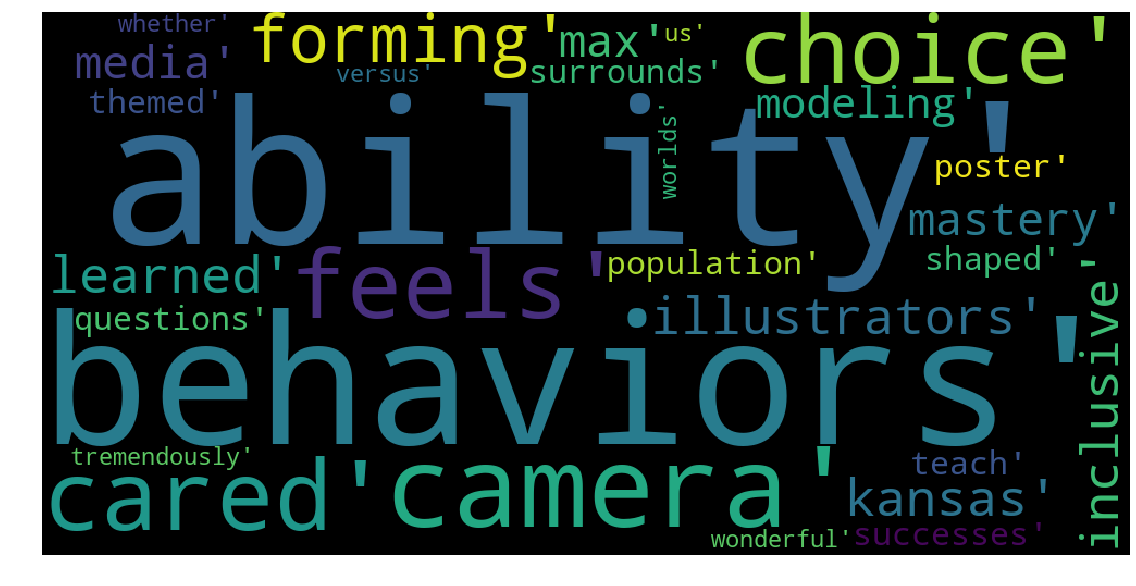

In [21]:
from wordcloud import WordCloud
# unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(str(fp_words))
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Box Plot

In [22]:
df2 = pd.DataFrame(X_test['price'])

In [23]:
df2_final = df2.iloc[fp_index,:]

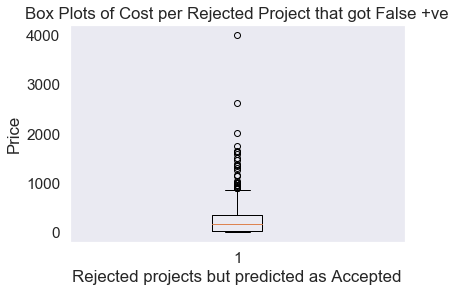

In [28]:
plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got False +ve')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

### PDF

In [29]:
df3 = pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

In [30]:
df3_final = df3.iloc[fp_index,:]

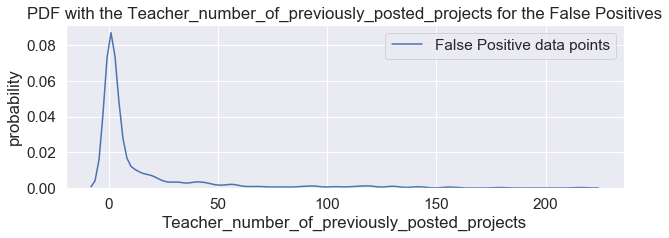

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positives')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation

In [31]:
tfidf_features_names = []

In [32]:
for a in vectorizer_cat.get_feature_names() :
    tfidf_features_names.append(a)

In [33]:
for a in vectorizer_sub_cat.get_feature_names() :
    tfidf_features_names.append(a)

In [34]:
for a in vectorizer_state.get_feature_names() :
    tfidf_features_names.append(a)

In [35]:
for a in vectorizer_teacherprefix.get_feature_names() :
    tfidf_features_names.append(a)

In [36]:
for a in vectorizer_projectgrade.get_feature_names() :
    tfidf_features_names.append(a)

In [37]:
tfidf_features_names.append("price")
tfidf_features_names.append("quantity")
tfidf_features_names.append("teacher_number_of_previously_posted")

In [38]:
for a in vectorizer_tfidf_essays.get_feature_names() :
    tfidf_features_names.append(a)

In [39]:
for a in vectorizer_tfidf_title.get_feature_names() :
    tfidf_features_names.append(a)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_tr,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

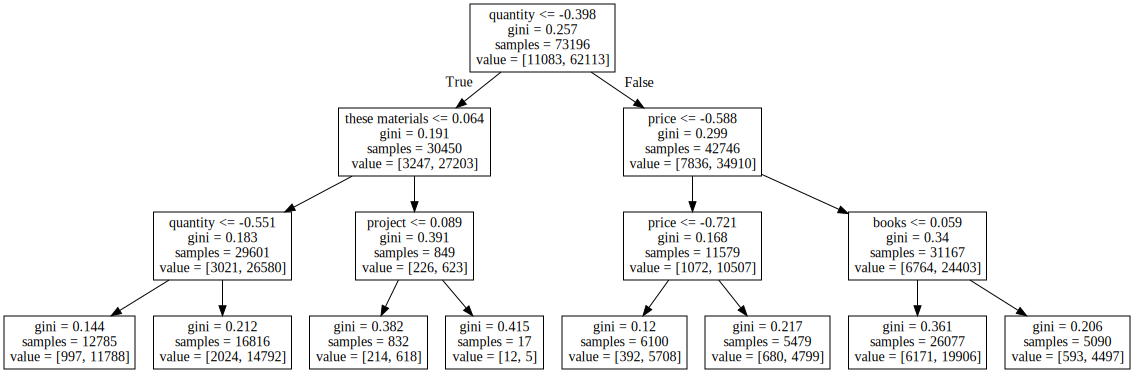

In [99]:
import graphviz
from sklearn import tree
from graphviz import Source
dot_data = tree.export_graphviz(dtree, out_file=None,feature_names=tfidf_features_names)
graph = graphviz.Source(dot_data)
graph.render("tfidf tree",view = True)
graphviz.Source(dot_data).view()

from IPython.display import display

with open("Source.gv") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# import graphviz
# from sklearn import tree
# from graphviz import Source
# dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=tfidf_features_names)
# graph = graphviz.Source(dot_data)
# graph.render("Tfidf tree",view = True)

In [1]:
import dill
# dill.dump_session('notebook_env2.db')
dill.load_session('notebook_env2.db')

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation

In [2]:
import dill
# dill.dump_session('notebook_env.db')
dill.load_session('../notebook_env.db')

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [1]:
# avg_w2v_titles_vectors_test

In [10]:
(len(avg_w2v_essays_vectors_train))

73196

In [3]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,avg_w2v_essays_vectors_train
               ,avg_w2v_titles_vectors_train)).tocsr()
# X_cr = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv
#                ,project_grade_category_one_hot_cv,price_standardized_cv,quantity_standardized_cv
#                ,teacher_number_of_previously_posted_projects_standardized_cv,avg_w2v_essays_vectors_cv
#                ,avg_w2v_titles_vectors_cv)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,avg_w2v_essays_vectors_test
               ,avg_w2v_titles_vectors_test)).tocsr()

print("Final Data matrix on AVGW2V")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on AVGW2V
(73196, 702) (73196,)
(36052, 702) (36052,)


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time


start_time = time.time()
dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split': [5, 10, 100]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



Execution time: 22999.034901857376 ms


In [4]:
train_auc = train_auc.reshape(5,3)
cv_auc = cv_auc.reshape(5,3)
train_auc
cv_auc

array([[0.57056045, 0.57056045, 0.57056045],
       [0.66453643, 0.66453643, 0.66451219],
       [0.62979046, 0.6294078 , 0.6364698 ],
       [0.53921166, 0.54491817, 0.57631011],
       [0.53923066, 0.53978692, 0.57041842]])

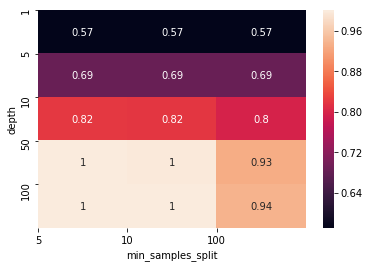

In [5]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()

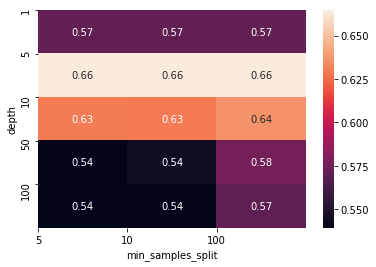

In [6]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()

In [11]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

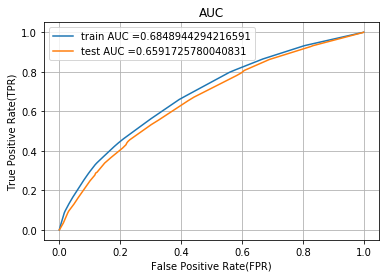

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=5)

dt.fit(X_tr, y_train)

y_train_pred = batch_predict(dt, X_tr[:,:])    
y_test_pred = batch_predict(dt, X_te[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [13]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [14]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.39981851845702854 for threshold 0.512
[[ 6715  4368]
 [21125 40988]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37701524186501034 for threshold 0.512
[[ 3149  2310]
 [10598 19995]]


the maximum value of tpr*(1-fpr) 0.39981851845702854 for threshold 0.512


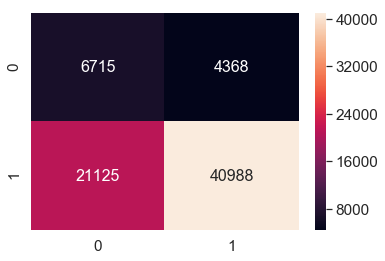

In [15]:
conf_matr_df_train =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.37701524186501034 for threshold 0.512


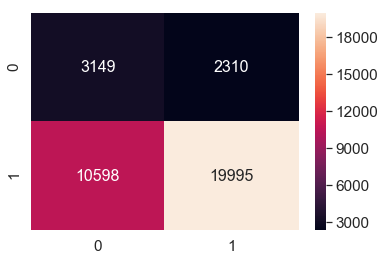

In [16]:
conf_matr_df_test =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation

In [1]:
import dill
# dill.dump_session('notebook_env.db')
dill.load_session('notebook_env.db')

C:\Users\LENOVO\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,tfidf_w2v_essays_vectors_train
               ,tfidf_w2v_titles_vectors_train)).tocsr()
# X_cr = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv
#                ,project_grade_category_one_hot_cv,price_standardized_cv,quantity_standardized_cv
#                ,teacher_number_of_previously_posted_projects_standardized_cv,tfidf_w2v_essays_vectors_cv
#                ,tfidf_w2v_titles_vectors_cv)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,tfidf_w2v_essays_vectors_test
               ,tfidf_w2v_titles_vectors_test)).tocsr()

print("Final Data matrix on TFIDF W2V")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on TFIDF W2V
(73196, 702) (73196,)
(36052, 702) (36052,)


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time


start_time = time.time()
dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split': [5, 10, 100]}

clf = GridSearchCV(dt, parameters, cv= 10, scoring='roc_auc')
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
print("Execution time: " + str((time.time() - start_time)) + ' ms')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



Execution time: 21351.2027657032 ms


In [4]:
train_auc = train_auc.reshape(5,3)
cv_auc = cv_auc.reshape(5,3)
train_auc
cv_auc

array([[0.57056045, 0.57056045, 0.57056045],
       [0.66181656, 0.66180046, 0.66180046],
       [0.63292   , 0.63211432, 0.63935663],
       [0.54295549, 0.54412641, 0.57894466],
       [0.54057402, 0.54341105, 0.57553801]])

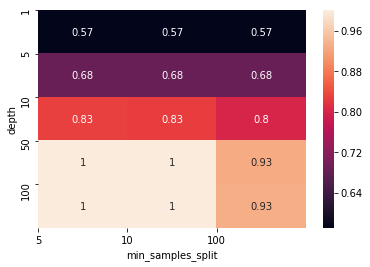

In [5]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(train_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()

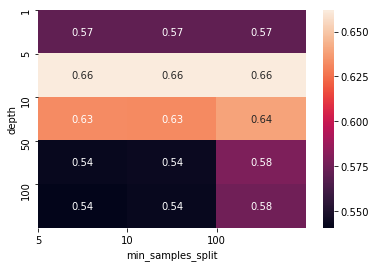

In [6]:
import matplotlib.pyplot as plt
# plt.show()

import numpy as np; np.random.seed(0)
import seaborn as sns


sns.heatmap(cv_auc,annot=True)

plt.yticks(np.arange(5), [1, 5, 10, 50, 100])
plt.xticks(np.arange(3), [5, 10, 100])

plt.xlabel('min_samples_split')
plt.ylabel('depth')


plt.show()

In [7]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

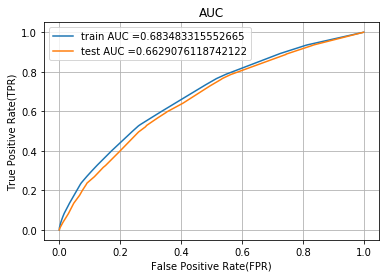

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced',max_depth=5,min_samples_split=5)

dt.fit(X_tr, y_train)

y_train_pred = batch_predict(dt, X_tr[:,:])    
y_test_pred = batch_predict(dt, X_te[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [9]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [10]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.39818457503950627 for threshold 0.484
[[ 7326  3757]
 [24697 37416]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.38612392172080595 for threshold 0.484
[[ 3535  1924]
 [12351 18242]]


the maximum value of tpr*(1-fpr) 0.39818457503950627 for threshold 0.484


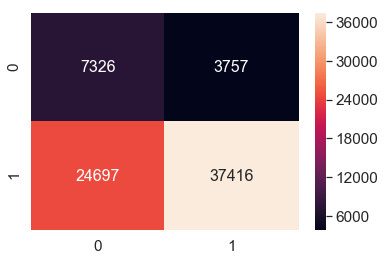

In [11]:
conf_matr_df_train =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.38612392172080595 for threshold 0.484


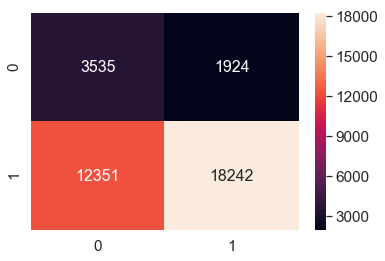

In [12]:
conf_matr_df_test =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [2]:
import dill
# dill.dump_session('notebook_env.db')
dill.load_session('notebook_env.db')

In [3]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train
               ,project_grade_category_one_hot_train,price_standardized_train,quantity_standardized_train
               ,teacher_number_of_previously_posted_projects_standardized_train,text_tfidf_train,title_tfidf_train)).tocsr()
# X_cr = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_one_hot_cv,teacher_prefix_one_hot_cv
#                ,project_grade_category_one_hot_cv,price_standardized_cv,quantity_standardized_cv
#                ,teacher_number_of_previously_posted_projects_standardized_cv,text_tfidf_cv,title_tfidf_cv)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test
               ,project_grade_category_one_hot_test,price_standardized_test,quantity_standardized_test
               ,teacher_number_of_previously_posted_projects_standardized_test,text_tfidf_test,title_tfidf_test)).tocsr()

print("Final Data matrix on TFIDF")
print(X_tr.shape, y_train.shape)
# print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix on TFIDF
(73196, 7733) (73196,)
(36052, 7733) (36052,)


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_tr, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
a=dt.tree_.compute_feature_importances(normalize=False)

In [6]:
set5 = pd.DataFrame(a)

In [7]:
set5 = np.transpose(set5)

In [8]:
set5.shape

(1, 7733)

In [19]:
best_indices = [] 
for j in range(7733):
    s = set5[j].sum()
    if s >0  :
        best_indices.append(j)
    else:
        continue

In [21]:
len(best_indices)

2717

In [22]:
a = X_tr.todense()

In [23]:
df_set_5_train = pd.DataFrame(a)
df_set_5_train.shape

(73196, 7733)

In [24]:
final_df_train = df_set_5_train.iloc[:, best_indices]

In [25]:
print(final_df_train.shape)
print(y_train.shape)

(73196, 2717)
(73196,)


In [26]:
b = X_te.todense()

In [27]:
df_set_5_test = pd.DataFrame(b)

In [28]:
final_df_test = df_set_5_test.iloc[:, best_indices]

In [29]:
print(final_df_test.shape)
print(y_test.shape)

(36052, 2717)
(36052,)


In [1]:
import dill
# dill.dump_session('notebook_env5.db')
# dill.load_session('notebook_env5.db')

## Applying Logistic Regression

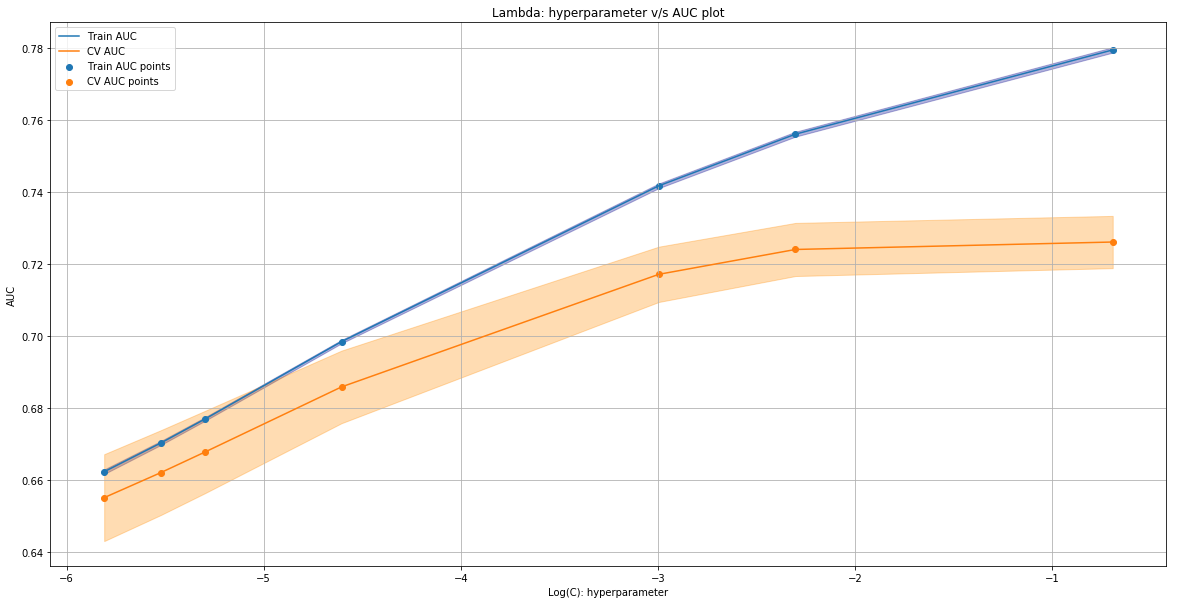

In [30]:
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

C= [0.003,0.004,0.005,0.01,0.05,0.1,0.5]
logi = LogisticRegression(class_weight='balanced')
parameters = {'C':C}
clf = GridSearchCV(logi, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
clf.fit(final_df_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

plt.figure(figsize=(20,10))
plt.plot(np.log(parameters['C']), train_auc, label='Train AUC')
# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['C']),train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
plt.plot(np.log(parameters['C']), cv_auc, label='CV AUC')
# https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log(parameters['C']),cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
plt.scatter(np.log(parameters['C']), train_auc, label='Train AUC points')
plt.scatter(np.log(parameters['C']), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("Lambda: hyperparameter v/s AUC plot")
plt.grid()

In [31]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

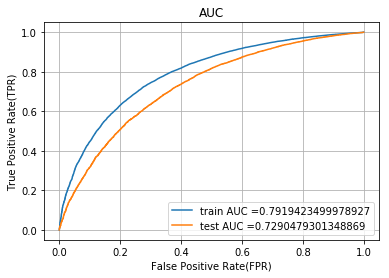

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


logi = LogisticRegression(C=0.1,class_weight='balanced')
logi.fit(X_tr[:,:], y_train[:])
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(logi, X_tr[:,:])    
y_test_pred = batch_predict(logi, X_te[:])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train[:], y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test[:], y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [37]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [38]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5237781799018443 for threshold 0.495
[[ 8026  3057]
 [17188 44925]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.45043330979522456 for threshold 0.567
[[ 4205  1254]
 [13625 16968]]


the maximum value of tpr*(1-fpr) 0.5237781799018443 for threshold 0.495


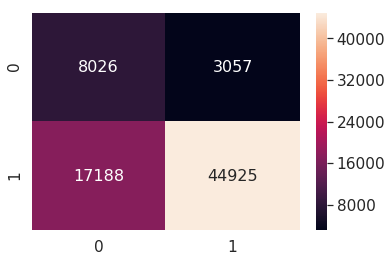

In [39]:
conf_matr_df_train =  pd.DataFrame(confusion_matrix(y_train[:], predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.45043330979522456 for threshold 0.567


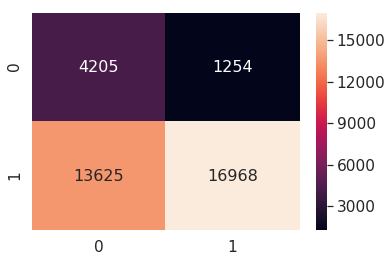

In [40]:
conf_matr_df_test =  pd.DataFrame(confusion_matrix(y_test[:], predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library

In [91]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter(Max_depth,Min_samples_split)", "AUC"]
x.add_row(["BOW", "Decision Tree", (10,5), 0.68])
x.add_row(["TFIDF", "Decision Tree", (10,5), 0.67])
x.add_row(["AVG W2V", "Decision Tree", (5,5), 0.65])
x.add_row(["TFIDF W2V", "Decision Tree", (5,5), 0.66])
x.add_row(["TOP FEATURES", "Logistic Regression(Alpha Hyperparameter)", 0.1, 0.72])
print(x)

+--------------+-------------------------------------------+----------------------------------------------+------+
|  Vectorizer  |                   Model                   | Hyper Parameter(Max_depth,Min_samples_split) | AUC  |
+--------------+-------------------------------------------+----------------------------------------------+------+
|     BOW      |               Decision Tree               |                   (10, 5)                    | 0.68 |
|    TFIDF     |               Decision Tree               |                   (10, 5)                    | 0.67 |
|   AVG W2V    |               Decision Tree               |                    (5, 5)                    | 0.65 |
|  TFIDF W2V   |               Decision Tree               |                    (5, 5)                    | 0.66 |
| TOP FEATURES | Logistic Regression(Alpha Hyperparameter) |                     0.1                      | 0.72 |
+--------------+-------------------------------------------+--------------------